# Developing Subgroup-Specific AI Models for Predicting 30-Day Readmission in Patients with Diabetes
# NOTE: 
This same code is used for the global model, and subgroup-specific models (Circulatory, respiratory, and ENMI)

The dataset was cleaned with the help of Excel and Python. However, for one-hot encoding, Python was used, and the cleaned data was saved as a csv file for analysis.

# Authors:
Mohammed Abdulai

Peter Mvuma

# Libraries

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter
import os

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

# Cross Validation

from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split

# Load Dataset

In [12]:

global = pd.read_csv("C:/Users/amysh/Desktop/yusha/diabeteslUnique_csv.csv")

# Filter Dataset by Subgroup-Specific

In [13]:
# circulatory = global[global["filter"] == "Circulatory"]
# respiratory = global[global["filter"] == "Respirator"]
# enmi = global[global["filter"] == "ENMI"]

In [14]:
print(circulatory.head())

    race  gender  age  admission_type  time_in_hospital  num_lab_procedures  \
0      1       1    6               1                 8                  77   
10     1       0    7               1                 8                  57   
13     1       0    8               0                 7                  27   
16     1       0    5               1                 1                  35   
19     1       0    8               0                 6                  65   

    num_procedures  num_medications  number_outpatient  number_emergency  ...  \
0                6               33                  0                 0  ...   
10               6               31                  0                 0  ...   
13               3               16                  0                 0  ...   
16               5               13                  0                 0  ...   
19               2               19                  0                 0  ...   

    prim_diag_Respiratory system  seco

In [15]:
# dataset inforamation
circulatory.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21832 entries, 0 to 71507
Data columns (total 34 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   race                                                                    21832 non-null  int64 
 1   gender                                                                  21832 non-null  int64 
 2   age                                                                     21832 non-null  int64 
 3   admission_type                                                          21832 non-null  int64 
 4   time_in_hospital                                                        21832 non-null  int64 
 5   num_lab_procedures                                                      21832 non-null  int64 
 6   num_procedures                                                          21832 non-null  int

# Define target, features, and standadize training set
# NOTE:
For global model, drop 'filter'

For Circulatory, respirator, and ENMI models, drop 'prim_diag_Circulatory system', 'ENMI', 'prim_diag_Others', and 'prim_diag_Respiratory system'

In [16]:
X = global.drop(columns=['target', 'filter'])
y = global["target"].astype(int)


RANDOM_STATE = 43

# split with stratification into 70/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Class distribution in training set:", Counter(y_train))

Class distribution in training set: Counter({0: 52180, 1: 5034})


# Dealing with Class Imbalance
Oversampling to address class imbalance

# Smote

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=45)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 52180, 1: 5034})
After SMOTE: Counter({0: 52180, 1: 52180})


# Modeling with Cross Validation


Model: Logistic Regression
Accuracy: 0.589 ± 0.004
Precision: 0.594 ± 0.005
Recall: 0.561 ± 0.002
F1: 0.577 ± 0.003
Roc_auc: 0.627 ± 0.004

Model: KNN
Accuracy: 0.834 ± 0.002
Precision: 0.752 ± 0.002
Recall: 0.997 ± 0.001
F1: 0.858 ± 0.002
Roc_auc: 0.943 ± 0.002

Model: SVM
Accuracy: 0.589 ± 0.004
Precision: 0.594 ± 0.004
Recall: 0.560 ± 0.002
F1: 0.577 ± 0.003
Roc_auc: 0.627 ± 0.004

Model: Decision Tree
Accuracy: 0.902 ± 0.002
Precision: 0.898 ± 0.003
Recall: 0.906 ± 0.002
F1: 0.902 ± 0.002
Roc_auc: 0.906 ± 0.002

Model: Random Forest
Accuracy: 0.924 ± 0.001
Precision: 0.978 ± 0.002
Recall: 0.869 ± 0.001
F1: 0.920 ± 0.001
Roc_auc: 0.964 ± 0.001

Model: XGBoost
Accuracy: 0.924 ± 0.001
Precision: 1.000 ± 0.000
Recall: 0.848 ± 0.003
F1: 0.918 ± 0.002
Roc_auc: 0.956 ± 0.001

Model: LightGBM
[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022999 seconds.
You can set `force_col_w

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7943
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.926 ± 0.001
[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7781
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7943
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7781
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7943
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7781
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7943
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


F1: 0.920 ± 0.001
[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7781
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7943
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Roc_auc: 0.957 ± 0.001
[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7781
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7943
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 41744, number of negative: 41744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7779
[LightGBM] [Info] Number of data points in the train set: 83488, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\amysh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


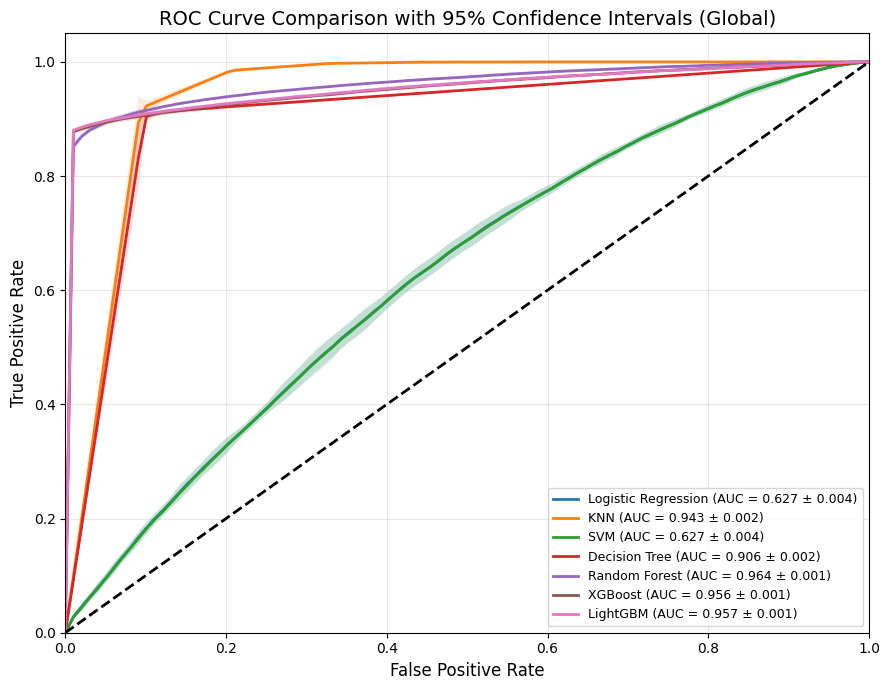


✅ Files saved successfully:
 - ROC curve figure: C:\Users\amysh/Desktop/yusha\ROC_Curve_Comparison_CI.png
 - Formatted metrics CSV: C:\Users\amysh/Desktop/yusha\Model_Performance_Summary.csv


In [6]:
# Define models
models = [
    ('Logistic Regression', LogisticRegression(penalty='elasticnet', l1_ratio=0.3, C=0.5,
                                               solver='saga', class_weight='balanced',
                                               max_iter=3000, random_state=RANDOM_STATE)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVM', LinearSVC(random_state=43)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=25, class_weight='balanced',
                                             random_state=RANDOM_STATE)),
    ('Random Forest', RandomForestClassifier(n_estimators=400, max_depth=12,
                                             class_weight='balanced_subsample',
                                             n_jobs=-1, random_state=RANDOM_STATE)),
    ('XGBoost', XGBClassifier(n_estimators=400, learning_rate=0.01, max_depth=4,
                              subsample=0.8, colsample_bytree=0.8, tree_method='hist',
                              n_jobs=-1, random_state=RANDOM_STATE)),
    ('LightGBM', LGBMClassifier(n_estimators=400, learning_rate=0.01, max_depth=4,
                                subsample=0.8, colsample_bytree=0.8, n_jobs=-1,
                                random_state=RANDOM_STATE, class_weight='balanced'))
]

# Cross-validation setup and scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}


# ROC curve and metrics table

plt.figure(figsize=(9, 7))
results_summary = []

for name, model in models:
    print(f"\nModel: {name}")
    metrics_dict = {'Model': name}

    # Cross-validated metrics 
    for score_name, scorer in scoring.items():
        cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=cv, scoring=scorer)
        mean_score, std_score = cv_results.mean(), cv_results.std()
        metrics_dict[f"{score_name}_formatted"] = f"{mean_score:.3f} ± {std_score:.3f}"
        print(f"{score_name.capitalize()}: {mean_score:.3f} ± {std_score:.3f}")

    # ROC with confidence intervals ---
    tprs, aucs = [], []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, val_idx in cv.split(X_train_smote, y_train_smote):
        # Handle both pandas DataFrames and numpy arrays
        if hasattr(X_train_smote, "iloc"):
            X_tr, X_val = X_train_smote.iloc[train_idx], X_train_smote.iloc[val_idx]
        else:
            X_tr, X_val = X_train_smote[train_idx], X_train_smote[val_idx]

        if hasattr(y_train_smote, "iloc"):
            y_tr, y_val = y_train_smote.iloc[train_idx], y_train_smote.iloc[val_idx]
        else:
            y_tr, y_val = y_train_smote[train_idx], y_train_smote[val_idx]

        model.fit(X_tr, y_tr)
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_val)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_val)
        else:
            y_score = model.predict(X_val)

        fpr, tpr, _ = roc_curve(y_val, y_score)
        tpr_interp = np.interp(mean_fpr, fpr, tpr)
        tpr_interp[0] = 0.0
        tprs.append(tpr_interp)
        aucs.append(auc(fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    std_tpr  = np.std(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc  = np.std(aucs)
    metrics_dict["AUC (mean±SD)"] = f"{mean_auc:.3f} ± {std_auc:.3f}"

    # 95% CI band
    tpr_upper = np.minimum(mean_tpr + 1.96 * std_tpr, 1)
    tpr_lower = np.maximum(mean_tpr - 1.96 * std_tpr, 0)

    plt.plot(mean_fpr, mean_tpr,
             lw=2, label=f"{name} (AUC = {mean_auc:.3f} ± {std_auc:.3f})")
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, alpha=0.15)

    results_summary.append(metrics_dict)


# Format Plot
# ------------------------------------------------------------
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison with 95% Confidence Intervals (Global)', fontsize=14)
plt.legend(loc='lower right', fontsize=9)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save results
# ------------------------------------------------------------
save_dir = os.path.expanduser("~/Desktop/yusha")
os.makedirs(save_dir, exist_ok=True)

# Save ROC figure
roc_path = os.path.join(save_dir, "ROC_Curve_Comparison_CI.png")
plt.savefig(roc_path, dpi=300, bbox_inches='tight')
plt.show()

# Save metrics summary CSV
df_summary = pd.DataFrame(results_summary)
ordered_cols = ['Model'] + [c for c in df_summary.columns if c != 'Model']
df_summary = df_summary[ordered_cols]

csv_path = os.path.join(save_dir, "Model_Performance_Summary.csv")
df_summary.to_csv(csv_path, index=False)

print(f"\n Files saved successfully:")
print(f" - ROC curve figure: {roc_path}")
print(f" - Formatted metrics CSV: {csv_path}")


# Retrain Best Model on the 80% Training Set and Test it on the Remaining 20% Unseen Test Data

In [23]:
# Random Forest model
rf = RandomForestClassifier(n_estimators=400, max_depth=12, class_weight='balanced_subsample', n_jobs=-1, random_state=RANDOM_STATE)

# Evaluating on the remaining 20% of the testing set
rf.fit(X_train_smote, y_train_smote)
ypred_rf = rf.predict(X_test)

print ('Classification Report_Random Forest (Global Model')
print(classification_report(y_test, ypred_rf))

Classification Report_Random Forest (Global Model
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     13045
           1       0.18      0.04      0.06      1259

    accuracy                           0.90     14304
   macro avg       0.55      0.51      0.50     14304
weighted avg       0.85      0.90      0.87     14304



# Confusion Matrix

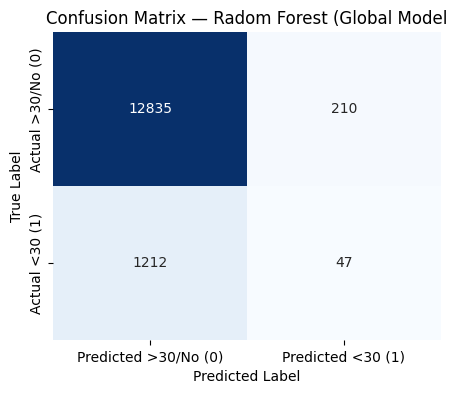

In [21]:
cm_dt = confusion_matrix(y_test, ypred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted >30/No (0)', 'Predicted <30 (1)'],
            yticklabels=['Actual >30/No (0)', 'Actual <30 (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix — Radom Forest (Global Model')
plt.show()

# Feature Importance

age                                                                       0.161328
num_procedures                                                            0.121653
discharge                                                                 0.111260
time_in_hospital                                                          0.103322
number_diagnoses                                                          0.084976
number_inpatient                                                          0.067735
gender                                                                    0.061370
admission_source                                                          0.046159
num_medications                                                           0.031589
insulin                                                                   0.030917
number_outpatient                                                         0.025366
change                                                                    0.022161
num_

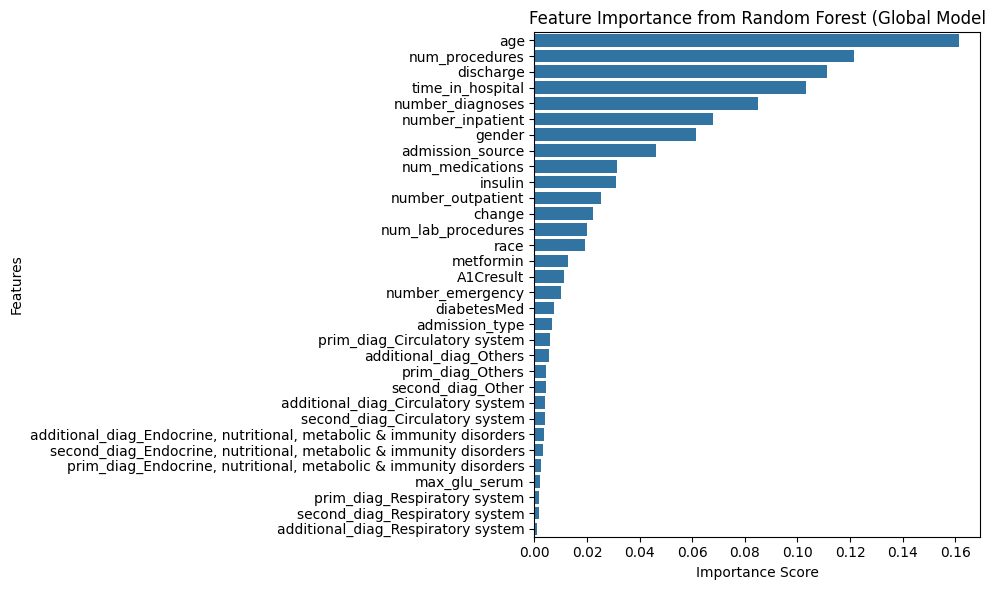

In [19]:
# Feature importance computation
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort in descending order
importances_sorted = importances.sort_values(ascending=False)

# Show top features
print(importances_sorted)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted, y=importances_sorted.index)
plt.title("Feature Importance from Random Forest (Global Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()